# 1. Import and Install Dependencies 

In [5]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [74]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [75]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [76]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image,results

In [77]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right

In [78]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=1, circle_radius=1))# Draw pose connections
    
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=1)) # Draw left hand connections
    
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=1)) # Draw right

In [79]:
cap = cv2.VideoCapture(0)

#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        # Read feed
        ret,frame=cap.read()
        
        # Make detections
        image,results = mediapipe_detection(frame,holistic)
        print(results)
        
        #draw landmarks
        draw_styled_landmarks(image,results)
        
        # show to screen
        cv2.imshow('OpneCV feed',image)
        
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [80]:
results

mediapipe.python.solution_base.SolutionOutputs

In [81]:
frame

array([[[170, 173, 177],
        [169, 172, 176],
        [169, 172, 176],
        ...,
        [184, 179, 181],
        [183, 177, 178],
        [184, 177, 178]],

       [[170, 173, 177],
        [170, 173, 177],
        [169, 172, 176],
        ...,
        [185, 180, 182],
        [186, 180, 181],
        [187, 180, 181]],

       [[171, 173, 177],
        [171, 173, 177],
        [170, 172, 176],
        ...,
        [184, 181, 183],
        [186, 182, 184],
        [186, 182, 184]],

       ...,

       [[ 48,  63,  79],
        [ 47,  62,  79],
        [ 46,  61,  80],
        ...,
        [ 44,  35,  69],
        [ 47,  37,  70],
        [ 50,  41,  72]],

       [[ 45,  60,  79],
        [ 45,  60,  79],
        [ 45,  60,  82],
        ...,
        [ 41,  33,  67],
        [ 43,  35,  68],
        [ 46,  39,  71]],

       [[ 43,  59,  79],
        [ 44,  60,  80],
        [ 44,  60,  84],
        ...,
        [ 38,  31,  65],
        [ 39,  32,  66],
        [ 42,  35,  69]]

In [82]:
draw_styled_landmarks(frame,results)

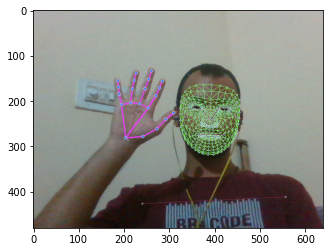

In [83]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [84]:
results.pose_landmarks

landmark {
  x: 0.6140112280845642
  y: 0.5039833784103394
  z: -1.0983794927597046
  visibility: 0.999268651008606
}
landmark {
  x: 0.6409936547279358
  y: 0.4490906000137329
  z: -1.0112597942352295
  visibility: 0.9988630414009094
}
landmark {
  x: 0.6609310507774353
  y: 0.45029374957084656
  z: -1.0114903450012207
  visibility: 0.9984506964683533
}
landmark {
  x: 0.6760437488555908
  y: 0.4526835083961487
  z: -1.0115885734558105
  visibility: 0.9984101057052612
}
landmark {
  x: 0.5785279870033264
  y: 0.4511241316795349
  z: -0.9909598231315613
  visibility: 0.9991123080253601
}
landmark {
  x: 0.5590187311172485
  y: 0.45241430401802063
  z: -0.9912987947463989
  visibility: 0.9991861581802368
}
landmark {
  x: 0.5423414707183838
  y: 0.45380884408950806
  z: -0.9918829798698425
  visibility: 0.999463677406311
}
landmark {
  x: 0.7002835869789124
  y: 0.49105304479599
  z: -0.5462690591812134
  visibility: 0.9981146454811096
}
landmark {
  x: 0.5254326462745667
  y: 0.4882513

In [85]:
pose=[]
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [86]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [87]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [88]:
result_test = extract_keypoints(results)

In [89]:
result_test

array([ 0.61401123,  0.50398338, -1.09837949, ...,  0.29317674,
        0.32365257, -0.02643898])

In [90]:
np.save('0',result_test)

In [91]:
np.load('0.npy')

array([ 0.61401123,  0.50398338, -1.09837949, ...,  0.29317674,
        0.32365257, -0.02643898])

# 4. Setup Folder for Collection

In [92]:
# path for exported data, numy arrays
DATA_PATH = os.path.join('Generated_Data')

# Actions that we try to detect
actions = np.array(['hello','thanks','OK'])

# Thrity videos worth of data
no_sequences = 30

# Videos are going to be  30 frames in length
sequence_length = 30

In [93]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass
    

# 5. Collect Keypoint Values for Training and Testing

In [21]:
cap = cv2.VideoCapture(0)

#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
        
                # Read feed
                ret,frame=cap.read()

                # Make detections
                image,results = mediapipe_detection(frame,holistic)
                print(results)

                #draw landmarks
                draw_styled_landmarks(image,results)
                
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION',(120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0),4,cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {} '.format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255),1,cv2.LINE_AA)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {} '.format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255),1,cv2.LINE_AA)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH,action,str(sequence), str(frame_num))
                np.save(npy_path,keypoints)

                # show to screen
                cv2.imshow('OpneCV feed',image)
        
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

# 6. Preprocessing Data and Create Labels and Features

In [94]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [95]:
label_map = {label:num for num, label in enumerate(actions)}

In [96]:
label_map

{'hello': 0, 'thanks': 1, 'OK': 2}

In [97]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [98]:
np.array(sequences).shape

(90, 30, 1662)

In [99]:
np.array(labels).shape

(90,)

In [100]:
x = np.array(sequences)

In [101]:
x.shape

(90, 30, 1662)

In [102]:
y = to_categorical(labels).astype(int)

In [103]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.05)

In [105]:
x_test.shape

(5, 30, 1662)

# 7. Build and Train LSTM Neural Network 

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [107]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [108]:
model = Sequential()
model.add(LSTM(64, return_sequences = True, activation = 'relu', input_shape = (30,1662)))
model.add(LSTM(128, return_sequences = True, activation = 'relu'))
model.add(LSTM(64, return_sequences = False, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(actions.shape[0], activation = 'softmax'))




In [109]:
res = [0.7,0.2,0.1]

In [110]:
actions[np.argmax(res)]

'hello'

In [111]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

In [112]:
model.fit(x_train,y_train,epochs = 2000, callbacks = [tb_callback])

Epoch 1/2000
3/3 [==============================] - 6s 613ms/step - loss: 1.2505 - categorical_accuracy: 0.3640
Epoch 2/2000
3/3 [==============================] - 0s 153ms/step - loss: 1.2467 - categorical_accuracy: 0.4637
Epoch 3/2000
3/3 [==============================] - 1s 198ms/step - loss: 1.6624 - categorical_accuracy: 0.2016
Epoch 4/2000
3/3 [==============================] - 1s 240ms/step - loss: 1.9180 - categorical_accuracy: 0.3229
Epoch 5/2000
3/3 [==============================] - 2s 828ms/step - loss: 3.6773 - categorical_accuracy: 0.3308
Epoch 6/2000
3/3 [==============================] - 2s 711ms/step - loss: 2.9228 - categorical_accuracy: 0.4345
Epoch 7/2000
3/3 [==============================] - 1s 571ms/step - loss: 2.5123 - categorical_accuracy: 0.4520
Epoch 8/2000
3/3 [==============================] - 1s 233ms/step - loss: 2.1344 - categorical_accuracy: 0.2877
Epoch 9/2000
3/3 [==============================] - 0s 154ms/step - loss: 2.2186 - categorical_accuracy:

3/3 [==============================] - 1s 180ms/step - loss: 0.8809 - categorical_accuracy: 0.5831
Epoch 74/2000
3/3 [==============================] - 0s 158ms/step - loss: 1.0793 - categorical_accuracy: 0.2897
Epoch 75/2000
3/3 [==============================] - 0s 150ms/step - loss: 1.0522 - categorical_accuracy: 0.4148
Epoch 76/2000
3/3 [==============================] - 1s 180ms/step - loss: 1.0299 - categorical_accuracy: 0.4306
Epoch 77/2000
3/3 [==============================] - 1s 189ms/step - loss: 1.0016 - categorical_accuracy: 0.3641
Epoch 78/2000
3/3 [==============================] - 0s 163ms/step - loss: 0.9117 - categorical_accuracy: 0.5342
Epoch 79/2000
3/3 [==============================] - 0s 158ms/step - loss: 0.8741 - categorical_accuracy: 0.5949
Epoch 80/2000
3/3 [==============================] - 1s 167ms/step - loss: 0.8635 - categorical_accuracy: 0.5480
Epoch 81/2000
3/3 [==============================] - 1s 196ms/step - loss: 0.8125 - categorical_accuracy: 0.70

3/3 [==============================] - 1s 176ms/step - loss: 1.0279 - categorical_accuracy: 0.62220s - loss: 1.0222 - categorical_accuracy: 0.65
Epoch 145/2000
3/3 [==============================] - 1s 169ms/step - loss: 1.0240 - categorical_accuracy: 0.5147
Epoch 146/2000
3/3 [==============================] - 1s 177ms/step - loss: 1.0201 - categorical_accuracy: 0.5754
Epoch 147/2000
3/3 [==============================] - 1s 169ms/step - loss: 0.9986 - categorical_accuracy: 0.6478
Epoch 148/2000
3/3 [==============================] - 0s 159ms/step - loss: 0.9802 - categorical_accuracy: 0.5185
Epoch 149/2000
3/3 [==============================] - 1s 209ms/step - loss: 0.9547 - categorical_accuracy: 0.6751
Epoch 150/2000
3/3 [==============================] - 1s 188ms/step - loss: 0.9277 - categorical_accuracy: 0.6125
Epoch 151/2000
3/3 [==============================] - 1s 205ms/step - loss: 0.8993 - categorical_accuracy: 0.6497
Epoch 152/2000
3/3 [==============================] - 1s 

3/3 [==============================] - 1s 175ms/step - loss: 1.0729 - categorical_accuracy: 0.3640
Epoch 216/2000
3/3 [==============================] - 1s 174ms/step - loss: 1.0352 - categorical_accuracy: 0.4835
Epoch 217/2000
3/3 [==============================] - 1s 180ms/step - loss: 0.9995 - categorical_accuracy: 0.4031
Epoch 218/2000
3/3 [==============================] - 1s 191ms/step - loss: 1.0270 - categorical_accuracy: 0.3523
Epoch 219/2000
3/3 [==============================] - 1s 171ms/step - loss: 0.9682 - categorical_accuracy: 0.5342
Epoch 220/2000
3/3 [==============================] - 1s 171ms/step - loss: 0.9951 - categorical_accuracy: 0.6243
Epoch 221/2000
3/3 [==============================] - 1s 165ms/step - loss: 0.9321 - categorical_accuracy: 0.6046
Epoch 222/2000
3/3 [==============================] - 1s 164ms/step - loss: 0.9512 - categorical_accuracy: 0.4443
Epoch 223/2000
3/3 [==============================] - 1s 185ms/step - loss: 0.9112 - categorical_accura

3/3 [==============================] - 0s 120ms/step - loss: 0.6369 - categorical_accuracy: 0.7710
Epoch 287/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.8329 - categorical_accuracy: 0.5246
Epoch 288/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.6742 - categorical_accuracy: 0.7045
Epoch 289/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.5508 - categorical_accuracy: 0.8493
Epoch 290/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.5778 - categorical_accuracy: 0.8493
Epoch 291/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.5760 - categorical_accuracy: 0.7848
Epoch 292/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.5025 - categorical_accuracy: 0.8512
Epoch 293/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.5583 - categorical_accuracy: 0.7769
Epoch 294/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.5517 - categorical_accura

Epoch 358/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.5352 - categorical_accuracy: 0.8102
Epoch 359/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.5656 - categorical_accuracy: 0.8396
Epoch 360/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.4650 - categorical_accuracy: 0.8826
Epoch 361/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.3887 - categorical_accuracy: 0.9295
Epoch 362/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.4317 - categorical_accuracy: 0.8943
Epoch 363/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.3901 - categorical_accuracy: 0.9178
Epoch 364/2000
3/3 [==============================] - 0s 150ms/step - loss: 0.4741 - categorical_accuracy: 0.8924
Epoch 365/2000
3/3 [==============================] - 1s 217ms/step - loss: 0.4282 - categorical_accuracy: 0.9061
Epoch 366/2000
3/3 [==============================] - 1s 257ms/step - loss: 0.5149 - cat

3/3 [==============================] - 0s 135ms/step - loss: 0.4688 - categorical_accuracy: 0.8454
Epoch 430/2000
3/3 [==============================] - 0s 138ms/step - loss: 0.4740 - categorical_accuracy: 0.8631
Epoch 431/2000
3/3 [==============================] - 0s 144ms/step - loss: 0.4823 - categorical_accuracy: 0.8631
Epoch 432/2000
3/3 [==============================] - 1s 145ms/step - loss: 0.4173 - categorical_accuracy: 0.8121
Epoch 433/2000
3/3 [==============================] - 0s 144ms/step - loss: 0.4163 - categorical_accuracy: 0.8943
Epoch 434/2000
3/3 [==============================] - 0s 143ms/step - loss: 0.3504 - categorical_accuracy: 0.8767
Epoch 435/2000
3/3 [==============================] - 0s 139ms/step - loss: 0.3470 - categorical_accuracy: 0.9119
Epoch 436/2000
3/3 [==============================] - 0s 142ms/step - loss: 0.3031 - categorical_accuracy: 0.9217
Epoch 437/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.2671 - categorical_accura

Epoch 501/2000
3/3 [==============================] - 1s 237ms/step - loss: 0.1761 - categorical_accuracy: 0.9472
Epoch 502/2000
3/3 [==============================] - 1s 219ms/step - loss: 0.1945 - categorical_accuracy: 0.9315
Epoch 503/2000
3/3 [==============================] - 1s 211ms/step - loss: 0.1703 - categorical_accuracy: 0.9472
Epoch 504/2000
3/3 [==============================] - 1s 249ms/step - loss: 0.1912 - categorical_accuracy: 0.9374
Epoch 505/2000
3/3 [==============================] - 1s 186ms/step - loss: 0.2035 - categorical_accuracy: 0.9315
Epoch 506/2000
3/3 [==============================] - 1s 176ms/step - loss: 0.1962 - categorical_accuracy: 0.9491
Epoch 507/2000
3/3 [==============================] - 1s 163ms/step - loss: 0.1619 - categorical_accuracy: 0.9472
Epoch 508/2000
3/3 [==============================] - 1s 165ms/step - loss: 0.2329 - categorical_accuracy: 0.9237
Epoch 509/2000
3/3 [==============================] - 1s 173ms/step - loss: 0.1641 - cat

3/3 [==============================] - 0s 160ms/step - loss: 0.3082 - categorical_accuracy: 0.9393
Epoch 573/2000
3/3 [==============================] - 0s 162ms/step - loss: 0.5366 - categorical_accuracy: 0.7770
Epoch 574/2000
3/3 [==============================] - 1s 210ms/step - loss: 0.3537 - categorical_accuracy: 0.8551
Epoch 575/2000
3/3 [==============================] - 1s 165ms/step - loss: 0.3865 - categorical_accuracy: 0.8688
Epoch 576/2000
3/3 [==============================] - 0s 150ms/step - loss: 0.3694 - categorical_accuracy: 0.8846
Epoch 577/2000
3/3 [==============================] - 1s 161ms/step - loss: 0.6062 - categorical_accuracy: 0.7574
Epoch 578/2000
3/3 [==============================] - 0s 143ms/step - loss: 0.4182 - categorical_accuracy: 0.8513
Epoch 579/2000
3/3 [==============================] - 1s 169ms/step - loss: 0.1882 - categorical_accuracy: 0.9472
Epoch 580/2000
3/3 [==============================] - 1s 151ms/step - loss: 0.2508 - categorical_accura

Epoch 644/2000
3/3 [==============================] - 1s 158ms/step - loss: 1.5154 - categorical_accuracy: 0.5559
Epoch 645/2000
3/3 [==============================] - 1s 178ms/step - loss: 0.4918 - categorical_accuracy: 0.7554
Epoch 646/2000
3/3 [==============================] - 1s 201ms/step - loss: 0.5273 - categorical_accuracy: 0.7828
Epoch 647/2000
3/3 [==============================] - 0s 159ms/step - loss: 0.3593 - categorical_accuracy: 0.9159
Epoch 648/2000
3/3 [==============================] - 1s 188ms/step - loss: 0.5341 - categorical_accuracy: 0.8415
Epoch 649/2000
3/3 [==============================] - 0s 163ms/step - loss: 0.2845 - categorical_accuracy: 0.9511
Epoch 650/2000
3/3 [==============================] - 1s 182ms/step - loss: 0.3224 - categorical_accuracy: 0.9550
Epoch 651/2000
3/3 [==============================] - 0s 165ms/step - loss: 0.3007 - categorical_accuracy: 0.9472
Epoch 652/2000
3/3 [==============================] - 1s 176ms/step - loss: 0.2911 - cat

3/3 [==============================] - 1s 161ms/step - loss: 0.1771 - categorical_accuracy: 0.9452
Epoch 716/2000
3/3 [==============================] - 1s 170ms/step - loss: 0.2045 - categorical_accuracy: 0.9296
Epoch 717/2000
3/3 [==============================] - 1s 170ms/step - loss: 0.1373 - categorical_accuracy: 0.9648
Epoch 718/2000
3/3 [==============================] - 0s 155ms/step - loss: 0.1386 - categorical_accuracy: 0.9608
Epoch 719/2000
3/3 [==============================] - 1s 174ms/step - loss: 0.1501 - categorical_accuracy: 0.9491
Epoch 720/2000
3/3 [==============================] - 1s 169ms/step - loss: 0.1595 - categorical_accuracy: 0.96080s - loss: 0.1430 - categorical_accuracy: 0.
Epoch 721/2000
3/3 [==============================] - 0s 151ms/step - loss: 0.1358 - categorical_accuracy: 0.9648
Epoch 722/2000
3/3 [==============================] - 1s 187ms/step - loss: 0.1526 - categorical_accuracy: 0.9511
Epoch 723/2000
3/3 [==============================] - 1s 19

3/3 [==============================] - 0s 152ms/step - loss: 0.1352 - categorical_accuracy: 0.9687
Epoch 787/2000
3/3 [==============================] - 1s 167ms/step - loss: 0.1679 - categorical_accuracy: 0.9569
Epoch 788/2000
3/3 [==============================] - 0s 161ms/step - loss: 0.1730 - categorical_accuracy: 0.9491
Epoch 789/2000
3/3 [==============================] - 1s 188ms/step - loss: 0.1642 - categorical_accuracy: 0.9569
Epoch 790/2000
3/3 [==============================] - 1s 172ms/step - loss: 0.1691 - categorical_accuracy: 0.9530
Epoch 791/2000
3/3 [==============================] - 0s 154ms/step - loss: 0.1739 - categorical_accuracy: 0.9491
Epoch 792/2000
3/3 [==============================] - 1s 191ms/step - loss: 0.1346 - categorical_accuracy: 0.9687
Epoch 793/2000
3/3 [==============================] - 1s 184ms/step - loss: 0.1738 - categorical_accuracy: 0.9491
Epoch 794/2000
3/3 [==============================] - 1s 197ms/step - loss: 0.1581 - categorical_accura

Epoch 858/2000
3/3 [==============================] - 1s 177ms/step - loss: 0.9905 - categorical_accuracy: 0.5891
Epoch 859/2000
3/3 [==============================] - 1s 161ms/step - loss: 0.9625 - categorical_accuracy: 0.5108
Epoch 860/2000
3/3 [==============================] - 1s 163ms/step - loss: 0.9449 - categorical_accuracy: 0.5324
Epoch 861/2000
3/3 [==============================] - 0s 142ms/step - loss: 0.9110 - categorical_accuracy: 0.6477
Epoch 862/2000
3/3 [==============================] - 1s 157ms/step - loss: 0.8893 - categorical_accuracy: 0.6282
Epoch 863/2000
3/3 [==============================] - 0s 166ms/step - loss: 0.8874 - categorical_accuracy: 0.6967
Epoch 864/2000
3/3 [==============================] - 1s 165ms/step - loss: 0.8579 - categorical_accuracy: 0.9080
Epoch 865/2000
3/3 [==============================] - 0s 165ms/step - loss: 0.8397 - categorical_accuracy: 0.6556
Epoch 866/2000
3/3 [==============================] - 0s 155ms/step - loss: 0.8049 - cat

3/3 [==============================] - 1s 217ms/step - loss: 0.1821 - categorical_accuracy: 0.9589
Epoch 930/2000
3/3 [==============================] - 1s 320ms/step - loss: 0.1875 - categorical_accuracy: 0.9569
Epoch 931/2000
3/3 [==============================] - 1s 294ms/step - loss: 0.1846 - categorical_accuracy: 0.9569
Epoch 932/2000
3/3 [==============================] - 1s 238ms/step - loss: 0.1785 - categorical_accuracy: 0.9550
Epoch 933/2000
3/3 [==============================] - 1s 262ms/step - loss: 0.2265 - categorical_accuracy: 0.9491
Epoch 934/2000
3/3 [==============================] - 1s 250ms/step - loss: 0.2260 - categorical_accuracy: 0.9432
Epoch 935/2000
3/3 [==============================] - 1s 229ms/step - loss: 0.2526 - categorical_accuracy: 0.9511
Epoch 936/2000
3/3 [==============================] - 1s 271ms/step - loss: 0.1933 - categorical_accuracy: 0.9550
Epoch 937/2000
3/3 [==============================] - 1s 236ms/step - loss: 0.2366 - categorical_accura

3/3 [==============================] - 0s 114ms/step - loss: 0.1987 - categorical_accuracy: 0.9491
Epoch 1001/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.1479 - categorical_accuracy: 0.9687
Epoch 1002/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.2332 - categorical_accuracy: 0.9296
Epoch 1003/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.1826 - categorical_accuracy: 0.9569
Epoch 1004/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.1648 - categorical_accuracy: 0.9569
Epoch 1005/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.2086 - categorical_accuracy: 0.9374
Epoch 1006/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.1588 - categorical_accuracy: 0.9569
Epoch 1007/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.1603 - categorical_accuracy: 0.9569
Epoch 1008/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.2042 - categorica

3/3 [==============================] - 0s 115ms/step - loss: 0.1417 - categorical_accuracy: 0.9530
Epoch 1072/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.1215 - categorical_accuracy: 0.9628
Epoch 1073/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.1469 - categorical_accuracy: 0.9550
Epoch 1074/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.1571 - categorical_accuracy: 0.9413
Epoch 1075/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.1095 - categorical_accuracy: 0.9745
Epoch 1076/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.1606 - categorical_accuracy: 0.9374
Epoch 1077/2000
3/3 [==============================] - 0s 138ms/step - loss: 0.0935 - categorical_accuracy: 0.9824
Epoch 1078/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.0981 - categorical_accuracy: 0.9745
Epoch 1079/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.0832 - categorica

3/3 [==============================] - 0s 111ms/step - loss: 1.0575 - categorical_accuracy: 0.3875
Epoch 1143/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.0544 - categorical_accuracy: 0.5557
Epoch 1144/2000
3/3 [==============================] - 0s 139ms/step - loss: 1.0529 - categorical_accuracy: 0.4755
Epoch 1145/2000
3/3 [==============================] - 0s 110ms/step - loss: 1.0512 - categorical_accuracy: 0.4442
Epoch 1146/2000
3/3 [==============================] - 0s 114ms/step - loss: 1.0490 - categorical_accuracy: 0.3504
Epoch 1147/2000
3/3 [==============================] - 0s 110ms/step - loss: 1.0454 - categorical_accuracy: 0.5949
Epoch 1148/2000
3/3 [==============================] - 0s 115ms/step - loss: 1.0481 - categorical_accuracy: 0.4736
Epoch 1149/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.0489 - categorical_accuracy: 0.4579
Epoch 1150/2000
3/3 [==============================] - 0s 115ms/step - loss: 1.0369 - categorica

3/3 [==============================] - 0s 116ms/step - loss: 0.6022 - categorical_accuracy: 0.8494
Epoch 1214/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.5233 - categorical_accuracy: 0.8591
Epoch 1215/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.5703 - categorical_accuracy: 0.8063
Epoch 1216/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.6388 - categorical_accuracy: 0.7613
Epoch 1217/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.6079 - categorical_accuracy: 0.7867
Epoch 1218/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.7195 - categorical_accuracy: 0.7398
Epoch 1219/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.5646 - categorical_accuracy: 0.8904
Epoch 1220/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.5841 - categorical_accuracy: 0.8356
Epoch 1221/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.5361 - categorica

3/3 [==============================] - 0s 107ms/step - loss: 0.4398 - categorical_accuracy: 0.8943
Epoch 1285/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.3940 - categorical_accuracy: 0.9022
Epoch 1286/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.4621 - categorical_accuracy: 0.8513
Epoch 1287/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.4186 - categorical_accuracy: 0.9022
Epoch 1288/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.4186 - categorical_accuracy: 0.8807
Epoch 1289/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.4429 - categorical_accuracy: 0.8435
Epoch 1290/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.5973 - categorical_accuracy: 0.7300
Epoch 1291/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.5475 - categorical_accuracy: 0.8259
Epoch 1292/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.7408 - categorica

3/3 [==============================] - 0s 120ms/step - loss: 0.4117 - categorical_accuracy: 0.8923
Epoch 1356/2000
3/3 [==============================] - 1s 198ms/step - loss: 0.4680 - categorical_accuracy: 0.9022
Epoch 1357/2000
3/3 [==============================] - 1s 272ms/step - loss: 0.4804 - categorical_accuracy: 0.8063
Epoch 1358/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.4812 - categorical_accuracy: 0.8826
Epoch 1359/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.4723 - categorical_accuracy: 0.8982
Epoch 1360/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.4020 - categorical_accuracy: 0.8396
Epoch 1361/2000
3/3 [==============================] - 0s 168ms/step - loss: 0.3980 - categorical_accuracy: 0.9080
Epoch 1362/2000
3/3 [==============================] - 0s 149ms/step - loss: 0.3962 - categorical_accuracy: 0.9295
Epoch 1363/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.4256 - categorica

3/3 [==============================] - 0s 163ms/step - loss: 0.3830 - categorical_accuracy: 0.9041
Epoch 1427/2000
3/3 [==============================] - 0s 147ms/step - loss: 0.3143 - categorical_accuracy: 0.9354
Epoch 1428/2000
3/3 [==============================] - 0s 159ms/step - loss: 0.3496 - categorical_accuracy: 0.9080
Epoch 1429/2000
3/3 [==============================] - 0s 165ms/step - loss: 0.2741 - categorical_accuracy: 0.9413
Epoch 1430/2000
3/3 [==============================] - 1s 187ms/step - loss: 0.2899 - categorical_accuracy: 0.9119
Epoch 1431/2000
3/3 [==============================] - 0s 169ms/step - loss: 0.3070 - categorical_accuracy: 0.9198
Epoch 1432/2000
3/3 [==============================] - 0s 141ms/step - loss: 0.4036 - categorical_accuracy: 0.8650
Epoch 1433/2000
3/3 [==============================] - 0s 139ms/step - loss: 0.2876 - categorical_accuracy: 0.9354
Epoch 1434/2000
3/3 [==============================] - 0s 165ms/step - loss: 0.3296 - categorica

3/3 [==============================] - 0s 147ms/step - loss: 0.2410 - categorical_accuracy: 0.9315
Epoch 1498/2000
3/3 [==============================] - 0s 149ms/step - loss: 0.2267 - categorical_accuracy: 0.9432
Epoch 1499/2000
3/3 [==============================] - 1s 195ms/step - loss: 0.2236 - categorical_accuracy: 0.9491
Epoch 1500/2000
3/3 [==============================] - 1s 172ms/step - loss: 0.2044 - categorical_accuracy: 0.9648
Epoch 1501/2000
3/3 [==============================] - 0s 161ms/step - loss: 0.2050 - categorical_accuracy: 0.9452
Epoch 1502/2000
3/3 [==============================] - 0s 148ms/step - loss: 0.2838 - categorical_accuracy: 0.9217
Epoch 1503/2000
3/3 [==============================] - 1s 172ms/step - loss: 0.2582 - categorical_accuracy: 0.9432
Epoch 1504/2000
3/3 [==============================] - 0s 154ms/step - loss: 0.1672 - categorical_accuracy: 0.9824
Epoch 1505/2000
3/3 [==============================] - 0s 158ms/step - loss: 0.1604 - categorica

3/3 [==============================] - 0s 133ms/step - loss: 0.2590 - categorical_accuracy: 0.9295
Epoch 1569/2000
3/3 [==============================] - 1s 196ms/step - loss: 0.2665 - categorical_accuracy: 0.9080
Epoch 1570/2000
3/3 [==============================] - 1s 162ms/step - loss: 0.2001 - categorical_accuracy: 0.9530
Epoch 1571/2000
3/3 [==============================] - 0s 171ms/step - loss: 0.1891 - categorical_accuracy: 0.9471
Epoch 1572/2000
3/3 [==============================] - 0s 161ms/step - loss: 0.2709 - categorical_accuracy: 0.9139
Epoch 1573/2000
3/3 [==============================] - 0s 159ms/step - loss: 0.2216 - categorical_accuracy: 0.9511
Epoch 1574/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.3162 - categorical_accuracy: 0.8943
Epoch 1575/2000
3/3 [==============================] - 1s 182ms/step - loss: 0.2169 - categorical_accuracy: 0.9550
Epoch 1576/2000
3/3 [==============================] - 0s 151ms/step - loss: 0.2098 - categorica

3/3 [==============================] - 0s 140ms/step - loss: 0.1715 - categorical_accuracy: 0.9667
Epoch 1640/2000
3/3 [==============================] - 0s 160ms/step - loss: 0.1515 - categorical_accuracy: 0.9706
Epoch 1641/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.1546 - categorical_accuracy: 0.9667
Epoch 1642/2000
3/3 [==============================] - 1s 185ms/step - loss: 0.1517 - categorical_accuracy: 0.9706
Epoch 1643/2000
3/3 [==============================] - 0s 144ms/step - loss: 0.1507 - categorical_accuracy: 0.9706
Epoch 1644/2000
3/3 [==============================] - 0s 158ms/step - loss: 0.1683 - categorical_accuracy: 0.9628
Epoch 1645/2000
3/3 [==============================] - 0s 149ms/step - loss: 0.2066 - categorical_accuracy: 0.9550
Epoch 1646/2000
3/3 [==============================] - 0s 186ms/step - loss: 0.1488 - categorical_accuracy: 0.9745
Epoch 1647/2000
3/3 [==============================] - 0s 163ms/step - loss: 0.1922 - categorica

3/3 [==============================] - 0s 165ms/step - loss: 0.1773 - categorical_accuracy: 0.9706
Epoch 1711/2000
3/3 [==============================] - 0s 149ms/step - loss: 0.1955 - categorical_accuracy: 0.9550
Epoch 1712/2000
3/3 [==============================] - 1s 170ms/step - loss: 0.1830 - categorical_accuracy: 0.9589
Epoch 1713/2000
3/3 [==============================] - 0s 164ms/step - loss: 0.1480 - categorical_accuracy: 0.9667
Epoch 1714/2000
3/3 [==============================] - 0s 162ms/step - loss: 0.1604 - categorical_accuracy: 0.9628
Epoch 1715/2000
3/3 [==============================] - 0s 157ms/step - loss: 0.1689 - categorical_accuracy: 0.9667
Epoch 1716/2000
3/3 [==============================] - 1s 173ms/step - loss: 0.1853 - categorical_accuracy: 0.9628
Epoch 1717/2000
3/3 [==============================] - 1s 211ms/step - loss: 0.1695 - categorical_accuracy: 0.9589
Epoch 1718/2000
3/3 [==============================] - 0s 147ms/step - loss: 0.1508 - categorica

3/3 [==============================] - 0s 164ms/step - loss: 0.1497 - categorical_accuracy: 0.9667
Epoch 1781/2000
3/3 [==============================] - 0s 152ms/step - loss: 0.1295 - categorical_accuracy: 0.9667
Epoch 1782/2000
3/3 [==============================] - 1s 158ms/step - loss: 0.1401 - categorical_accuracy: 0.9706
Epoch 1783/2000
3/3 [==============================] - 0s 150ms/step - loss: 0.1829 - categorical_accuracy: 0.9491
Epoch 1784/2000
3/3 [==============================] - 1s 167ms/step - loss: 0.1890 - categorical_accuracy: 0.9472
Epoch 1785/2000
3/3 [==============================] - 0s 166ms/step - loss: 0.1268 - categorical_accuracy: 0.9745
Epoch 1786/2000
3/3 [==============================] - 0s 169ms/step - loss: 0.1656 - categorical_accuracy: 0.96280s - loss: 0.1687 - categorical_accuracy: 0.
Epoch 1787/2000
3/3 [==============================] - 0s 159ms/step - loss: 0.1391 - categorical_accuracy: 0.9706
Epoch 1788/2000
3/3 [==============================]

3/3 [==============================] - 1s 164ms/step - loss: 0.1357 - categorical_accuracy: 0.9628
Epoch 1851/2000
3/3 [==============================] - 0s 157ms/step - loss: 0.1496 - categorical_accuracy: 0.9667
Epoch 1852/2000
3/3 [==============================] - 0s 153ms/step - loss: 0.1128 - categorical_accuracy: 0.9726
Epoch 1853/2000
3/3 [==============================] - 1s 179ms/step - loss: 0.1583 - categorical_accuracy: 0.9608
Epoch 1854/2000
3/3 [==============================] - 0s 145ms/step - loss: 0.1911 - categorical_accuracy: 0.9432
Epoch 1855/2000
3/3 [==============================] - 0s 150ms/step - loss: 0.1287 - categorical_accuracy: 0.9843
Epoch 1856/2000
3/3 [==============================] - 0s 144ms/step - loss: 0.1699 - categorical_accuracy: 0.9491
Epoch 1857/2000
3/3 [==============================] - 0s 153ms/step - loss: 0.1488 - categorical_accuracy: 0.9472
Epoch 1858/2000
3/3 [==============================] - 0s 158ms/step - loss: 0.1194 - categorica

3/3 [==============================] - 1s 256ms/step - loss: 0.0973 - categorical_accuracy: 0.9804
Epoch 1922/2000
3/3 [==============================] - 1s 169ms/step - loss: 0.1333 - categorical_accuracy: 0.9628
Epoch 1923/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.1615 - categorical_accuracy: 0.9648
Epoch 1924/2000
3/3 [==============================] - 0s 164ms/step - loss: 0.1542 - categorical_accuracy: 0.9648
Epoch 1925/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.0800 - categorical_accuracy: 0.9882
Epoch 1926/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.0850 - categorical_accuracy: 0.9843
Epoch 1927/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.1258 - categorical_accuracy: 0.9628
Epoch 1928/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.0871 - categorical_accuracy: 0.9784
Epoch 1929/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.1363 - categorica

3/3 [==============================] - 0s 166ms/step - loss: 0.1040 - categorical_accuracy: 0.9765
Epoch 1993/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.0985 - categorical_accuracy: 0.9765
Epoch 1994/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.1125 - categorical_accuracy: 0.9726
Epoch 1995/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.0972 - categorical_accuracy: 0.9726
Epoch 1996/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.1303 - categorical_accuracy: 0.9648
Epoch 1997/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.0867 - categorical_accuracy: 0.9765
Epoch 1998/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.0898 - categorical_accuracy: 0.9804
Epoch 1999/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.1150 - categorical_accuracy: 0.9726
Epoch 2000/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.0795 - categorica

In [113]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

# Make Predictions

In [114]:
res = model.predict(x_test)

In [115]:
actions[np.argmax(res[0])]

'OK'

In [116]:
actions[np.argmax(y_test[0])]

'OK'

In [117]:
y_test

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])

# 9. Save Weights

In [51]:
model.save('action.h5')

In [52]:
del model

In [61]:
model.load_weights('action.h5')

# 10. Evaluation using  Confusion Matrix and Accuracy

In [118]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [119]:
yhat = model.predict(x_test)

In [120]:
ytrue = np.argmax(y_test,axis = 1).tolist()
yhat = np.argmax(yhat,axis = 1).tolist()

In [121]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[3, 0],
        [0, 2]],

       [[4, 0],
        [0, 1]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [122]:
accuracy_score(ytrue,yhat)

1.0

# 11. Test in Real Time

In [123]:
!pip install pyttsx3

In [124]:
import pyttsx3

In [125]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5
engine = pyttsx3.init()

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                            engine.say(actions[np.argmax(res)])
                            engine.runAndWait()
                    else:
                        sentence.append(actions[np.argmax(res)])
            if len(sentence) > 5: 
                sentence = sentence[-5:]

            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
OK
